<a href="https://colab.research.google.com/github/pamelaAHeredia/BigData_DataAnalytics/blob/main/c24017_Grupo_156_TP_P2_Anal%C3%ADtica_auditor%C3%ADa_CMM_Paraguay_Jun_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes

* Antonela Belmonte
* Pamela Heredia
* Sabrina Iorgi
* Sergio Durelli

# Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Datos

In [ ]:
# carga de datos desde origen XLS
df_sales_in_paraguay = pd.read_csv("https://docs.google.com/spreadsheets/d/1hsJkHRC3MbDBzVvyMR5sanmaEuI-wOIg/gviz/tq?tqx=out:csv&sheet=sales_in_Paraguay")

# carga de datos desde origen CSV
df_distributors_profile = pd.read_csv('https://drive.google.com/uc?export=download&id=1tGc9vEOQ0pZa9J15jguN5dps9S78FaNH', thousands='.')
df_exports_to_paraguay = pd.read_csv('https://drive.google.com/uc?export=download&id=1A1_lBKw7L9JInVrqN-HhalFjmxd1Pp3k', thousands='.')
df_locations_profile = pd.read_csv('https://drive.google.com/uc?export=download&id=1HULr0Tt1sWmKaK9rjEirZKKt02yej-uD', thousands='.')

In [ ]:
sales_paraguay = df_sales_in_paraguay.copy()

In [ ]:
exports_paraguay = df_exports_to_paraguay.copy()

In [ ]:
loc_profile = df_locations_profile.copy()

In [ ]:
distr_profile = df_distributors_profile.copy()

# Funciones útiles

In [ ]:
def normalize_columns(df, **kwargs):
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.replace(' ', '_')
  for k in kwargs:
    df.rename(columns={k : kwargs[k]}, inplace=True)
  return df

def clean_format(df):
  for col in list(df.columns[1:]):
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace('.','')
    df[col] = df[col].str.replace(',','.')
    df[col] = df[col].astype(float)
  return df

def convert_float_to_int(df, col):
  df[col] = df[col].astype(str)
  df[col] = df[col].str.replace('.0', '')
  df[col] = df[col].str.replace('.', '')
  df[col] = df[col].astype(int)


#Formato de visualización de datos tipo float

In [ ]:
pd.options.display.float_format = '{:.2f}'.format  # 123456.55

# Dataset sales_paraguay

## Exploración inicial

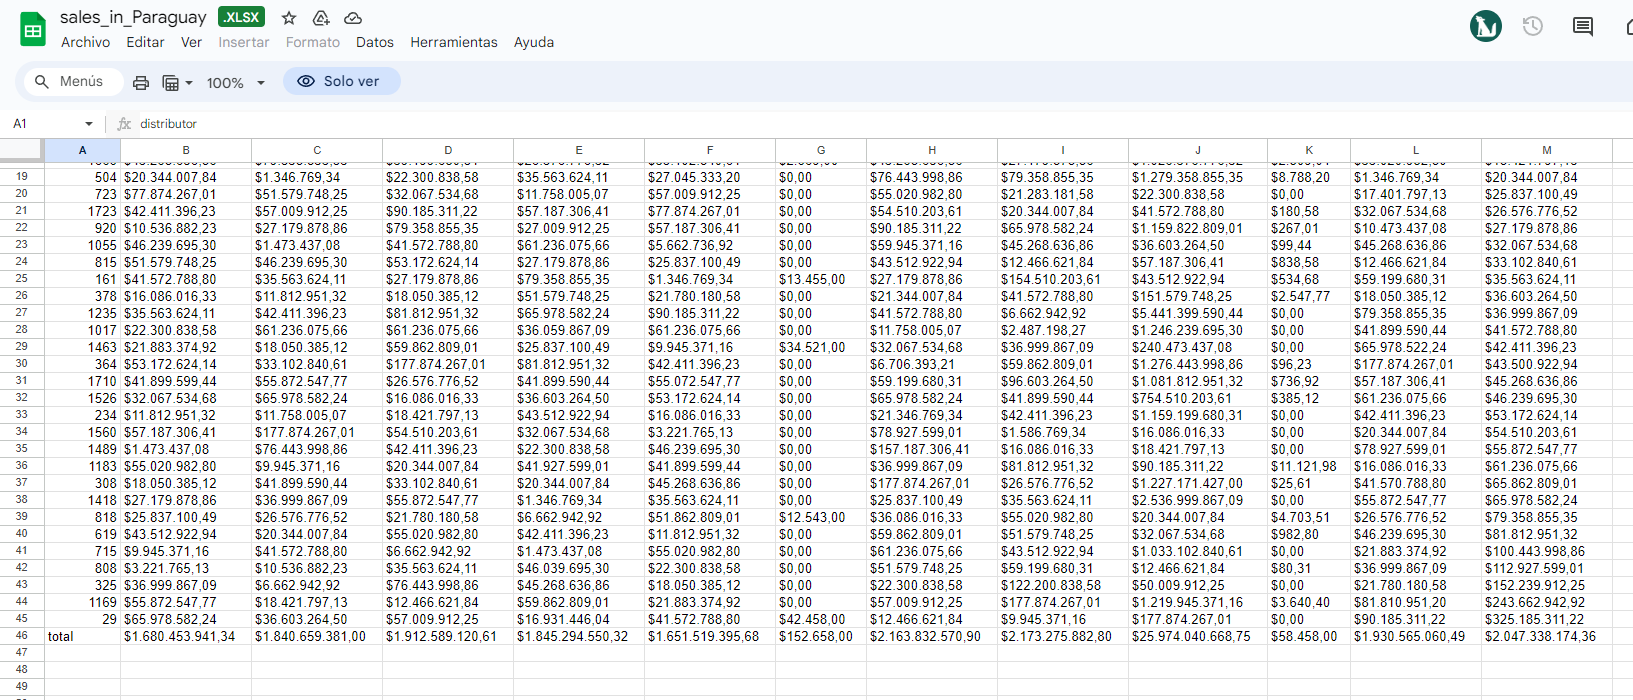

In [ ]:
# vemos tipos de datos
print(df_sales_in_paraguay.dtypes)

distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object


In [ ]:
# buscamos nulos y los sumamos
df_sales_in_paraguay.isnull().sum()

distributor    1
Rubber         0
Brass          0
Vinyl          0
Granite        0
Stone          0
Brick          0
Aluminum       0
Glass          0
Plexiglass     0
Steel          0
Wood           0
Plastic        0
dtype: int64

In [ ]:
# visualizamos datos nulos
# en distributor
print(df_sales_in_paraguay.loc[df_sales_in_paraguay.distributor.isnull() == True])

    distributor             Rubber              Brass              Vinyl  \
44          NaN  $1.680.453.941,34  $1.840.659.381,00  $1.912.589.120,61   

              Granite              Stone        Brick           Aluminum  \
44  $1.845.294.550,32  $1.651.519.395,68  $152.658,00  $2.163.832.570,90   

                Glass          Plexiglass       Steel               Wood  \
44  $2.173.275.882,80  $25.974.040.668,75  $58.458,00  $1.930.565.060,49   

              Plastic  
44  $2.047.338.174,36  


In [ ]:
# revisamos si hay duplicados
print("Registros duplicados:", df_sales_in_paraguay.duplicated().sum())

Registros duplicados: 0


In [ ]:
# visualizacion gral de los datos
sales_paraguay

distributor             Rubber              Brass              Vinyl  \
0         583.0     $54.510.203,61     $45.268.636,86     $51.579.748,25   
1        1104.0     $32.438.788,20     $25.837.100,49     $36.603.264,50   
2        1384.0     $21.780.180,58     $78.927.599,01     $25.837.100,49   
3         379.0     $79.358.855,35     $90.185.311,22     $45.268.636,86   
4        1599.0     $11.758.005,07     $21.780.180,58     $57.187.306,41   
5        1062.0     $90.185.311,22     $43.512.922,94     $11.758.005,07   
6        1679.0     $78.927.599,01     $57.187.306,41     $41.899.590,44   
7        1302.0      $5.662.736,92     $59.862.809,01     $46.239.695,30   
8         565.0     $57.009.912,25     $53.172.624,14     $36.999.867,09   
9         860.0     $36.603.264,50     $54.510.203,61      $1.346.769,34   
10        707.0     $59.199.680,31     $59.199.680,31      $9.945.371,16   
11        846.0     $61.236.075,66     $32.067.534,68     $21.883.374,92   
12        175.0     $26.576.776,52     $22.300.838,58      $1.473.437,08   
13        241.0     $59.862.809,01     $55.020.982,80     $78.927.599,01   
14       1553.0     $33.102.840,61     $21.883.374,92     $43.512.922,94   
15       1093.0      $1.346.769,34     $16.086.016,33     $65.978.582,24   
16       1666.0     $45.268.636,86     $79.358.855,35     $59.199.680,31   
17        504.0     $20.344.007,84      $1.346.769,34     $22.300.838,58   
18        723.0     $77.874.267,01     $51.579.748,25     $32.067.534,68   
19       1723.0     $42.411.396,23     $57.009.912,25     $90.185.311,22   
20        920.0     $10.536.882,23     $27.179.878,86     $79.358.855,35   
21       1055.0     $46.239.695,30      $1.473.437,08     $41.572.788,80   
22        815.0     $51.579.748,25     $46.239.695,30     $53.172.624,14   
23        161.0     $41.572.788,80     $35.563.624,11     $27.179.878,86   
24        378.0     $16.086.016,33     $11.812.951,32     $18.050.385,12   
25       1235.0     $35.563.624,11     $42.411.396,23     $81.812.951,32   
26       1017.0     $22.300.838,58     $61.236.075,66     $61.236.075,66   
27       1463.0     $21.883.374,92     $18.050.385,12     $59.862.809,01   
28        364.0     $53.172.624,14     $33.102.840,61    $177.874.267,01   
29       1710.0     $41.899.599,44     $55.872.547,77     $26.576.776,52   
30       1526.0     $32.067.534,68     $65.978.582,24     $16.086.016,33   
31        234.0     $11.812.951,32     $11.758.005,07     $18.421.797,13   
32       1560.0     $57.187.306,41    $177.874.267,01     $54.510.203,61   
33       1489.0      $1.473.437,08     $76.443.998,86     $42.411.396,23   
34       1183.0     $55.020.982,80      $9.945.371,16     $20.344.007,84   
35        308.0     $18.050.385,12     $41.899.590,44     $33.102.840,61   
36       1418.0     $27.179.878,86     $36.999.867,09     $55.872.547,77   
37        818.0     $25.837.100,49     $26.576.776,52     $21.780.180,58   
38        619.0     $43.512.922,94     $20.344.007,84     $55.020.982,80   
39        715.0      $9.945.371,16     $41.572.788,80      $6.662.942,92   
40        808.0      $3.221.765,13     $10.536.882,23     $35.563.624,11   
41        325.0     $36.999.867,09      $6.662.942,92     $76.443.998,86   
42       1169.0     $55.872.547,77     $18.421.797,13     $12.466.621,84   
43         29.0     $65.978.582,24     $36.603.264,50     $57.009.912,25   
44          NaN  $1.680.453.941,34  $1.840.659.381,00  $1.912.589.120,61   

              Granite              Stone        Brick           Aluminum  \
0      $21.780.180,58     $26.576.776,52        $0,00     $55.872.547,77   
1      $21.883.374,92      $1.473.437,08        $0,00     $46.239.695,30   
2      $33.102.840,61     $51.579.748,25        $0,00     $21.883.374,92   
3      $54.510.203,61     $59.358.855,35        $0,00     $79.358.855,35   
4       $9.945.371,16     $32.067.534,68        $0,00     $53.172.624,14   
5      $76.443.998,86     $36.999.867,09   $23.012,

**Correcciones a realizar:**
*   Los nombres de las columnas no siguen un formato uniforme. Se decide usar minúsculas para evitar posibles problemas futuros en el procesamiento (por ejemplo, a la hora de hacer un merge)
*   Normalizar Columnas (renombrar "distributor" a "distributor_id")
*   La columna distribuidor está declarada como tipo float, pero al ser un id, se usará int.
*   El resto de las columnas es de tipo object, se limpiarán los caracteres especiales y se convertirá a float para poder operar con ellos.
*   Eliminar nulos, fila de totales index = '44'



## Limpieza de datos

In [ ]:
# normalizamos nombres de columnas
sales_paraguay = normalize_columns(sales_paraguay, distributor= 'distributor_id')

In [ ]:
# borramos linea de totales de ventas x producto
sales_paraguay.drop([44], inplace=True)

In [ ]:
# cambio de tipo de dato
convert_float_to_int(sales_paraguay, 'distributor_id')

In [ ]:
sales_paraguay = clean_format(sales_paraguay)

In [ ]:
# revisamos tipos de datos final
sales_paraguay.dtypes

distributor_id      int64
rubber            float64
brass             float64
vinyl             float64
granite           float64
stone             float64
brick             float64
aluminum          float64
glass             float64
plexiglass        float64
steel             float64
wood              float64
plastic           float64
dtype: object

In [ ]:
# No hay valores duplicados
sales_paraguay.duplicated().value_counts()

False    44
Name: count, dtype: int64

In [ ]:
sales_paraguay.head(20)

distributor_id       rubber        brass        vinyl       granite  \
0              583  54510203.61  45268636.86  51579748.25  2.178018e+07   
1             1104  32438788.20  25837100.49  36603264.50  2.188337e+07   
2             1384  21780180.58  78927599.01  25837100.49  3.310284e+07   
3              379  79358855.35  90185311.22  45268636.86  5.451020e+07   
4             1599  11758005.07  21780180.58  57187306.41  9.945371e+06   
5             1062  90185311.22  43512922.94  11758005.07  7.644400e+07   
6             1679  78927599.01  57187306.41  41899590.44  1.805039e+07   
7             1302   5662736.92  59862809.01  46239695.30  9.018531e+07   
8              565  57009912.25  53172624.14  36999867.09  5.919968e+07   
9              860  36603264.50  54510203.61   1346769.34  1.842180e+07   
10             707  59199680.31  59199680.31   9945371.16  5.587255e+07   
11             846  61236075.66  32067534.68  21883374.92  5.317262e+07   
12             175  26576776.52  22300838.58   1473437.08  4.157279e+07   
13             241  59862809.01  55020982.80  78927599.01  5.502098e+07   
14            1553  33102840.61  21883374.92  43512922.94  1.778743e+08   
15            1093   1346769.34  16086016.33  65978582.24  1.246662e+07   
16            1666  45268636.86  79358855.35  59199680.31  2.657678e+07   
17             504  20344007.84   1346769.34  22300838.58  3.556362e+07   
18             723  77874267.01  51579748.25  32067534.68  1.175801e+07   
19            1723  42411396.23  57009912.25  90185311.22  5.718731e+07   

          stone    brick     aluminum        glass    plexiglass    steel  \
0   26576776.52      0.0  55872547.77  18050385.12  1.789276e+08  2788.80   
1    1473437.08      0.0  46239695.30  33102840.61  3.556362e+07   599.01   
2   51579748.25      0.0  21883374.92  78927599.01  1.346769e+06     0.00   
3   59358855.35      0.0  79358855.35  32067534.68  5.317262e+07  2922.94   
4   32067534.68      0.0  53172624.14  57187306.41  1.155873e+09   203.61   
5   36999867.09  23012.0  51673437.08  61236075.66  1.659786e+08   840.61   
6   20344007.84      0.0  35563624.11  90185311.22  1.218834e+08   855.35   
7   36603264.50      0.0  81812951.32  57009912.25  4.241140e+07     6.86   
8   78927599.01  12548.0  42411396.23  55872547.77  2.583710e+07    82.23   
9   10536882.23      0.0  21780180.58  11758005.07  1.175801e+07  7306.41   
10  43512922.94  11452.0  26576776.52  18421797.13  1.221780e+09  3374.92   
11  59199680.31      0.0  33102840.61  25837100.49  1.180504e+08    76.52   
12  65978582.24      0.0  41899590.44  21883374.92  1.612361e+08   437.08   
13  54510203.61      0.0  28421797.13  46239695.30  5.502098e+07   951.32   
14  32438788.20      0.0  18050385.12  53172624.14  4.526864e+07    95.30   
15  11758005.07      0.0  36603264.50  76473998.86  1.126663e+09    78.86   
16  33102840.61   2669.0  45268636.86  27179878.86  1.026577e+09  2809.01   
17  27045333.20      0.0  76443998.86  79358855.35  1.279359e+09  8788.20   
18  57009912.25      0.0  55020982.80  21283181.58  2.230084e+07     0.00   
19  77874267.01      0.0  54510203.61  20344007.84  4.157279e+07   180.58   

           wood      plastic  
0   54510203.61     20982.80  
1    9945371.16    187306.41  
2   36603264.50    300838.58  
3   33102840.61    579748.25  
4   43512922.94    730734.07  
5   27179878.86    780180.58  
6   11758005.07    883374.92  
7   35563624.11    899590.44  
8   22300838.58   1346769.34  
9   76443998.86   1473437.08  
10  25837100.49   7874267.01  
11  57009912.25   9945371.16  
12  16662942.92  11758005.07  
13  53172624.14  12466621.84  
14  51579748.25  16086016.33  
15  59862809.01  18050385.12  
16  55020982.80  18421797.13  
17   1346769.34  20344007.84  
18  17401797.13  25837100.49  
19  32067534.68  26576776.52

# Dataset exports_paraguay

## Exploración inicial

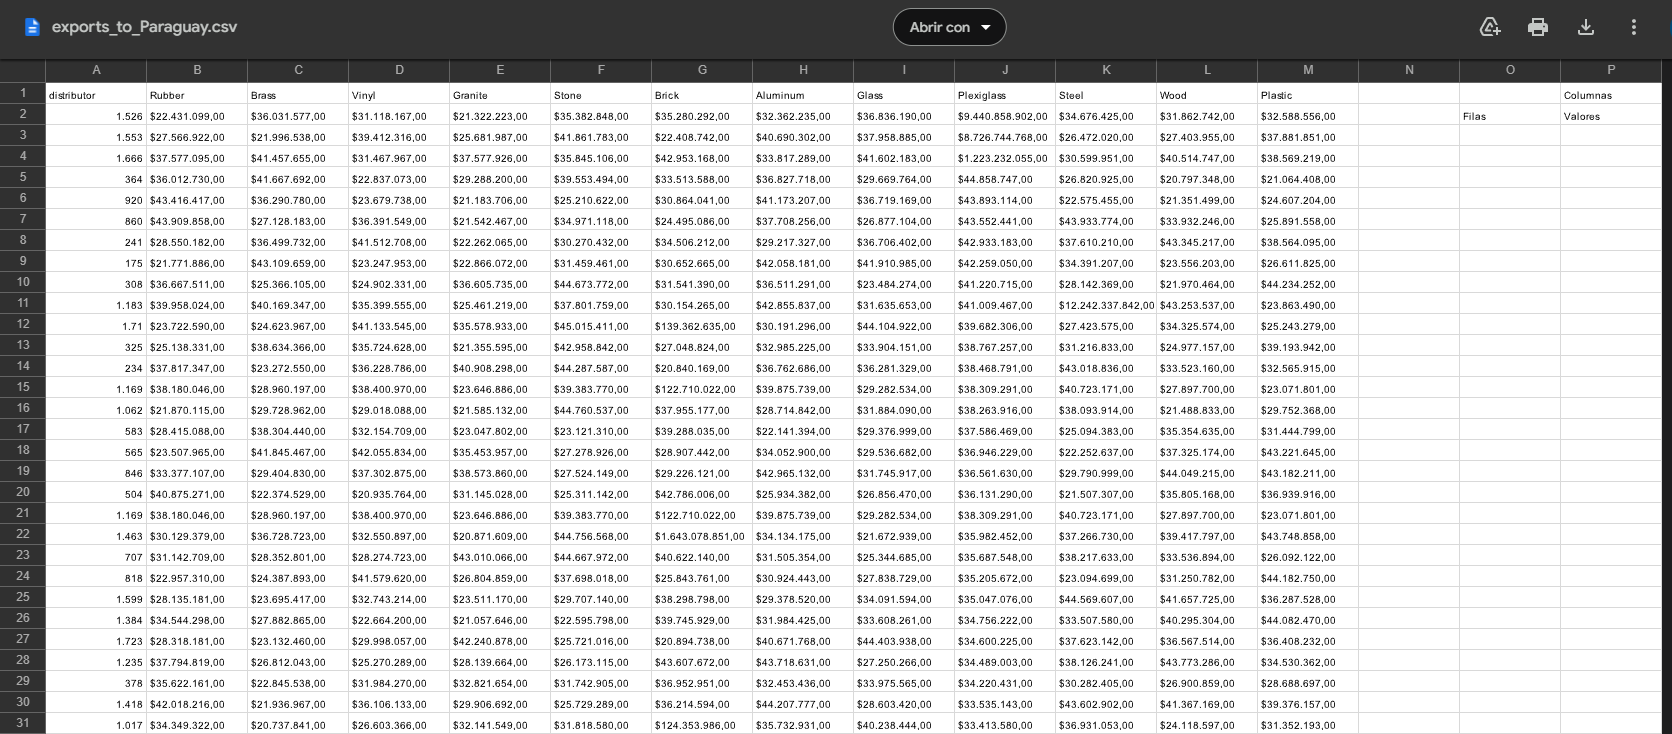

In [ ]:
# vemos tipos de datos
print(exports_paraguay.dtypes)

distributor      int64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
Unnamed: 13    float64
Unnamed: 14     object
Columnas        object
dtype: object


In [ ]:
# buscamos nulos y los sumamos
exports_paraguay.isnull().sum()

distributor     0
Rubber          0
Brass           0
Vinyl           0
Granite         0
Stone           0
Brick           0
Aluminum        0
Glass           0
Plexiglass      0
Steel           0
Wood            0
Plastic         0
Unnamed: 13    46
Unnamed: 14    45
Columnas       45
dtype: int64

In [ ]:
# revisamos si hay duplicados
print("Registros duplicados:", exports_paraguay.duplicated().sum())

Registros duplicados: 2


In [ ]:
# vemos datos duplicados
print(exports_paraguay.loc[exports_paraguay.duplicated() == True])

    distributor          Rubber           Brass           Vinyl  \
19         1169  $38.180.046,00  $28.960.197,00  $38.400.970,00   
41          325  $25.138.331,00  $38.634.366,00  $35.724.628,00   

           Granite           Stone            Brick        Aluminum  \
19  $23.646.886,00  $39.383.770,00  $122.710.022,00  $39.875.739,00   
41  $21.355.595,00  $42.958.842,00   $27.048.824,00  $32.985.225,00   

             Glass      Plexiglass           Steel            Wood  \
19  $29.282.534,00  $38.309.291,00  $40.723.171,00  $27.897.700,00   
41  $33.904.151,00  $38.767.257,00  $31.216.833,00  $24.977.157,00   

           Plastic  Unnamed: 13 Unnamed: 14 Columnas  
19  $23.071.801,00          NaN         NaN      NaN  
41  $39.193.942,00          NaN         NaN      NaN  


In [ ]:
# visualizacion gral de los datos
exports_paraguay

distributor          Rubber           Brass           Vinyl  \
0          1526  $22.431.099,00  $36.031.577,00  $31.118.167,00   
1          1553  $27.566.922,00  $21.996.538,00  $39.412.316,00   
2          1666  $37.577.095,00  $41.457.655,00  $31.467.967,00   
3           364  $36.012.730,00  $41.667.692,00  $22.837.073,00   
4           920  $43.416.417,00  $36.290.780,00  $23.679.738,00   
5           860  $43.909.858,00  $27.128.183,00  $36.391.549,00   
6           241  $28.550.182,00  $36.499.732,00  $41.512.708,00   
7           175  $21.771.886,00  $43.109.659,00  $23.247.953,00   
8           308  $36.667.511,00  $25.366.105,00  $24.902.331,00   
9          1183  $39.958.024,00  $40.169.347,00  $35.399.555,00   
10         1710  $23.722.590,00  $24.623.967,00  $41.133.545,00   
11          325  $25.138.331,00  $38.634.366,00  $35.724.628,00   
12          234  $37.817.347,00  $23.272.550,00  $36.228.786,00   
13         1169  $38.180.046,00  $28.960.197,00  $38.400.970,00   
14         1062  $21.870.115,00  $29.728.962,00  $29.018.088,00   
15          583  $28.415.088,00  $38.304.440,00  $32.154.709,00   
16          565  $23.507.965,00  $41.845.467,00  $42.055.834,00   
17          846  $33.377.107,00  $29.404.830,00  $37.302.875,00   
18          504  $40.875.271,00  $22.374.529,00  $20.935.764,00   
19         1169  $38.180.046,00  $28.960.197,00  $38.400.970,00   
20         1463  $30.129.379,00  $36.728.723,00  $32.550.897,00   
21          707  $31.142.709,00  $28.352.801,00  $28.274.723,00   
22          818  $22.957.310,00  $24.387.893,00  $41.579.620,00   
23         1599  $28.135.181,00  $23.695.417,00  $32.743.214,00   
24         1384  $34.544.298,00  $27.882.865,00  $22.664.200,00   
25         1723  $28.318.181,00  $23.132.460,00  $29.998.057,00   
26         1235  $37.794.819,00  $26.812.043,00  $25.270.289,00   
27          378  $35.622.161,00  $22.845.538,00  $31.984.270,00   
28         1418  $42.018.216,00  $21.936.967,00  $36.106.133,00   
29         1017  $34.349.322,00  $20.737.841,00  $26.603.366,00   
30          808  $44.229.593,00  $42.500.506,00  $33.478.392,00   
31         1489  $41.444.583,00  $23.735.516,00  $29.708.711,00   
32         1104  $41.387.139,00  $32.973.505,00  $38.520.126,00   
33         1055  $35.858.240,00  $22.072.249,00  $21.646.802,00   
34         1560  $37.489.497,00  $22.875.902,00  $34.374.638,00   
35          161  $20.607.246,00  $23.005.062,00  $27.506.653,00   
36          815  $32.853.600,00  $43.936.493,00  $31.944.768,00   
37          723  $29.585.885,00  $42.849.169,00  $30.521.280,00   
38           29  $43.576.523,00  $30.181.558,00  $32.773.382,00   
39          379  $42.160.913,00  $41.409.478,00  $37.110.518,00   
40         1679  $27.799.295,00  $44.568.676,00  $26.843.228,00   
41          325  $25.138.331,00  $38.634.366,00  $35.724.628,00   
42          619  $41.761.417,00  $33.709.306,00  $27.497.587,00   
43          715  $20.880.116,00  $37.111.825,00  $34.422.161,00   
44         1302  $34.050.845,00  $30.151.961,00  $26.956.027,00   
45         1093  $35.580.430,00  $39.978.595,00  $32.046.855,00   

           Granite           Stone              Brick        Aluminum  \
0   $21.322.223,00  $35.382.848,00     $35.280.292,00  $32.362.235,00   
1   $25.681.987,00  $41.861.783,00     $22.408.742,00  $40.690.302,00   
2   $37.577.926,00  $35.845.106,00     $42.953.168,00  $33.817.289,00   
3   $29.288.200,00  $39.553.494,00     $33.513.588,00  $36.827.718,00   
4   $21.183.706,00  $25.210.622,00     $30.864.041,00  $41.173.207,00   
5   $21.542.467,00  $34.971.118,00     $24.495.086,00  $37.708.256,00   
6   $22.262.065,00  $30.270.432,00     $34.506.212,00  $29.217.327,00   
7   $22.866.072,00  $31.459.461,00     $30.652.665,00  $42.058.181,00   
8   $36.605.735,00  $44.673.772,00     $31.541.390,00  $36.511.291,00   
9   $25.461.219,00  $37.801.759,00     $30.154.265,00  $42.855.837,00   
10  $35.578.933,00  $45.015.411,00    $139.362.635,

**Correcciones a realizar:**

*   Normalizar Columnas (renombrar "distributor" a "Distributor_id")
*   Eliminar columnas con datos invalidos (Unnamed: 13, Unnamed: 14 y Columnas)
*   Eliminar datos duplicados, fila 19 y 41, generar lista de index a eliminar
*   Limpiar datos de importes, quitar simbolo $, quitar "." y cambiar decimal a "." finalmente convertir dato a tipo float

## Limpieza de datos

In [ ]:
# normalizamos nombres de columnas
exports_paraguay = normalize_columns(exports_paraguay)

In [ ]:
# renombramos columna
exports_paraguay.rename(columns={'distributor':'distributor_id'}, inplace=True)

In [ ]:
# hacemos una lista de los elementos a eliminar
lista_filas_eliminar = list(exports_paraguay.loc[exports_paraguay.duplicated() == True].index)
print(lista_filas_eliminar)

[19, 41]


In [ ]:
# hacemos lista de columnas a eliminar
lista_col_eliminar = list(exports_paraguay.columns[13:])
print(lista_col_eliminar)

['unnamed:_13', 'unnamed:_14', 'columnas']


In [ ]:
# eliminamos columnas sin datos y filas con datos duplicados
exports_paraguay.drop(columns=lista_col_eliminar, inplace=True)
exports_paraguay.drop(lista_filas_eliminar, inplace=True)

In [ ]:
exports_paraguay = clean_format(exports_paraguay)

In [ ]:
# revisamos tipos de datos final
exports_paraguay.dtypes

distributor_id      int64
rubber            float64
brass             float64
vinyl             float64
granite           float64
stone             float64
brick             float64
aluminum          float64
glass             float64
plexiglass        float64
steel             float64
wood              float64
plastic           float64
dtype: object

In [ ]:
# No hay valores duplicados
exports_paraguay.duplicated().value_counts()

False    44
Name: count, dtype: int64

In [ ]:
exports_paraguay.head(20)

distributor_id      rubber       brass       vinyl     granite  \
0             1526  22431099.0  36031577.0  31118167.0  21322223.0   
1             1553  27566922.0  21996538.0  39412316.0  25681987.0   
2             1666  37577095.0  41457655.0  31467967.0  37577926.0   
3              364  36012730.0  41667692.0  22837073.0  29288200.0   
4              920  43416417.0  36290780.0  23679738.0  21183706.0   
5              860  43909858.0  27128183.0  36391549.0  21542467.0   
6              241  28550182.0  36499732.0  41512708.0  22262065.0   
7              175  21771886.0  43109659.0  23247953.0  22866072.0   
8              308  36667511.0  25366105.0  24902331.0  36605735.0   
9             1183  39958024.0  40169347.0  35399555.0  25461219.0   
10            1710  23722590.0  24623967.0  41133545.0  35578933.0   
11             325  25138331.0  38634366.0  35724628.0  21355595.0   
12             234  37817347.0  23272550.0  36228786.0  40908298.0   
13            1169  38180046.0  28960197.0  38400970.0  23646886.0   
14            1062  21870115.0  29728962.0  29018088.0  21585132.0   
15             583  28415088.0  38304440.0  32154709.0  23047802.0   
16             565  23507965.0  41845467.0  42055834.0  35453957.0   
17             846  33377107.0  29404830.0  37302875.0  38573860.0   
18             504  40875271.0  22374529.0  20935764.0  31145028.0   
20            1463  30129379.0  36728723.0  32550897.0  20871609.0   

         stone         brick    aluminum       glass    plexiglass  \
0   35382848.0  3.528029e+07  32362235.0  36836190.0  9.440859e+09   
1   41861783.0  2.240874e+07  40690302.0  37958885.0  8.726745e+09   
2   35845106.0  4.295317e+07  33817289.0  41602183.0  1.223232e+09   
3   39553494.0  3.351359e+07  36827718.0  29669764.0  4.485875e+07   
4   25210622.0  3.086404e+07  41173207.0  36719169.0  4.389311e+07   
5   34971118.0  2.449509e+07  37708256.0  26877104.0  4.355244e+07   
6   30270432.0  3.450621e+07  29217327.0  36706402.0  4.293318e+07   
7   31459461.0  3.065266e+07  42058181.0  41910985.0  4.225905e+07   
8   44673772.0  3.154139e+07  36511291.0  23484274.0  4.122072e+07   
9   37801759.0  3.015426e+07  42855837.0  31635653.0  4.100947e+07   
10  45015411.0  1.393626e+08  30191296.0  44104922.0  3.968231e+07   
11  42958842.0  2.704882e+07  32985225.0  33904151.0  3.876726e+07   
12  44287587.0  2.084017e+07  36762686.0  36281329.0  3.846879e+07   
13  39383770.0  1.227100e+08  39875739.0  29282534.0  3.830929e+07   
14  44760537.0  3.795518e+07  28714842.0  31884090.0  3.826392e+07   
15  23121310.0  3.928804e+07  22141394.0  29376999.0  3.758647e+07   
16  27278926.0  2.890744e+07  34052900.0  29536682.0  3.694623e+07   
17  27524149.0  2.922612e+07  42965132.0  31745917.0  3.656163e+07   
18  25311142.0  4.278601e+07  25934382.0  26856470.0  3.613129e+07   
20  44756568.0  1.643079e+09  34134175.0  21672939.0  3.598245e+07   

           steel        wood     plastic  
0   3.467642e+07  31862742.0  32588556.0  
1   2.647202e+07  27403955.0  37881851.0  
2   3.059995e+07  40514747.0  38569219.0  
3   2.682092e+07  20797348.0  21064408.0  
4   2.257546e+07  21351499.0  24607204.0  
5   4.393377e+07  33932246.0  25891558.0  
6   3.761021e+07  43345217.0  38564095.0  
7   3.439121e+07  23556203.0  26611825.0  
8   2.814237e+07  21970464.0  44234252.0  
9   1.224234e+10  43253537.0  23863490.0  
10  2.742358e+07  34325574.0  25243279.0  
11  3.121683e+07  24977157.0  39193942.0  
12  4.301884e+07  33523160.0  32565915.0  
13  4.072317e+07  27897700.0  23071801.0  
14  3.809391e+07  21488833.0  29752368.0  
15  2.509438e+07  35354635.0  31444799.0  
16  2.225264e+07  37325174.0  43221645.0  
17  2.979100e+07  44049215.0  43182211.0  
18  2.150731e+07  35805168.0  36939916.0  
20  3.726673e+07  39417797.0  43748858.0

#Visualización Ventas vs Exportaciones

In [ ]:
totals_sales = sales_paraguay.iloc[:, 1:].sum()
totals_exports = exports_paraguay.iloc[:, 1:].sum()

In [ ]:
totals_df = pd.DataFrame({'sales': totals_sales, 'exports':totals_exports}, index= sales_paraguay.columns[1:])

In [ ]:
totals_df.index.name = 'product'
totals_df.reset_index(inplace=True)

In [ ]:
totals_df

product         sales       exports
0       rubber  1.680454e+09  1.465042e+09
1        brass  1.840659e+09  1.394439e+09
2        vinyl  1.912589e+09  1.396050e+09
3      granite  1.845295e+09  1.337170e+09
4        stone  1.651519e+09  1.474571e+09
5        brick  1.526580e+05  5.260549e+09
6     aluminum  2.163833e+09  1.513170e+09
7        glass  2.173276e+09  1.429787e+09
8   plexiglass  2.597404e+10  2.077923e+10
9        steel  5.845797e+04  1.365293e+10
10        wood  1.930565e+09  1.409172e+09
11     plastic  2.047338e+09  1.456144e+09

In [ ]:
totals_df_sorted = totals_df.sort_values(by='sales')

In [ ]:
fig = px.line(totals_df_sorted, x= 'product', y=['sales','exports'], markers=True)
fig.update_traces(textposition="bottom right")
fig.show()

## Inferencias

El gráfico muestra que la venta de ladrillos y acero es baja en comparación con las exportaciones.

A continuación, analizaremos los siguientes datasets para buscar una explicación a este fenómeno.

# Dataset distr_profile

## Exploración inicial

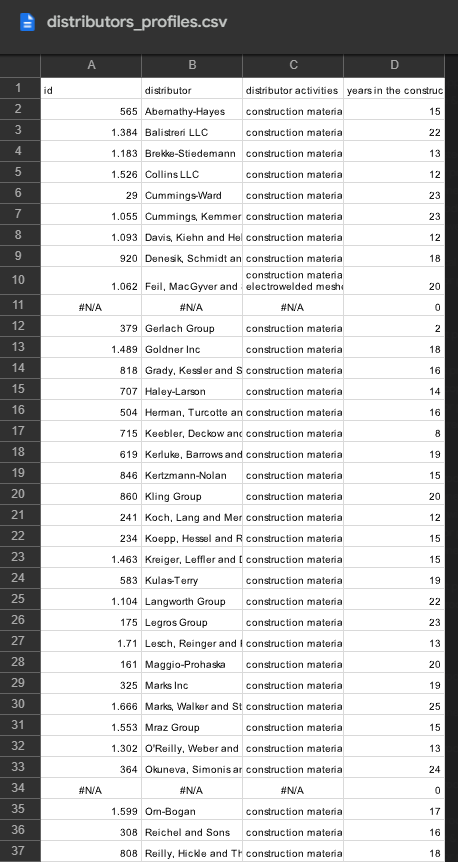

In [ ]:
# Info del ds: incluye filas x columnas, tipos de datos, cantidad de no-null y nombres de columnas
distr_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                44 non-null     float64
 1   distributor                       44 non-null     object 
 2   distributor activities            44 non-null     object 
 3   years in the construction market  46 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# vemos tipos de datos
print(distr_profile.dtypes)

id                                  float64
distributor                          object
distributor activities               object
years in the construction market      int64
dtype: object


In [ ]:
# buscamos nulos y los sumamos
distr_profile.isnull().sum()

id                                  2
distributor                         2
distributor activities              2
years in the construction market    0
dtype: int64

In [ ]:
distr_profile[distr_profile.isna().any(axis=1)]

id distributor distributor activities  years in the construction market
9  NaN         NaN                    NaN                                 0
32 NaN         NaN                    NaN                                 0

In [ ]:
# Eliminar valores null
distr_profile = distr_profile.dropna().copy()

In [ ]:
# shape original: (46,4)
distr_profile.shape

(44, 4)

Se eliminaron las dos filas con valores nulos. Ya no hay registros duplicados.

In [ ]:
distr_profile.isnull().sum()

id                                  0
distributor                         0
distributor activities              0
years in the construction market    0
dtype: int64

In [ ]:
# revisamos si hay duplicados
print("Registros duplicados:", distr_profile.duplicated().sum())

Registros duplicados: 0


In [ ]:
# vemos datos duplicados
print(distr_profile.loc[distr_profile.duplicated() == True])

Empty DataFrame
Columns: [id, distributor, distributor activities, years in the construction market]
Index: []


In [ ]:
# visualizacion gral de los datos
distr_profile

id                        distributor  \
0    565.0                    Abernathy-Hayes   
1   1384.0                     Balistreri LLC   
2   1183.0                  Brekke-Stiedemann   
3   1526.0                        Collins LLC   
4     29.0                      Cummings-Ward   
5   1055.0        Cummings, Kemmer and Walker   
6   1093.0            Davis, Kiehn and Heller   
7    920.0         Denesik, Schmidt and Wyman   
8   1062.0     Feil, MacGyver and Schamberger   
10   379.0                      Gerlach Group   
11  1489.0                        Goldner Inc   
12   818.0          Grady, Kessler and Stokes   
13   707.0                       Haley-Larson   
14   504.0       Herman, Turcotte and Osinski   
15   715.0        Keebler, Deckow and Watsica   
16   619.0       Kerluke, Barrows and Murazik   
17   846.0                    Kertzmann-Nolan   
18   860.0                        Kling Group   
19   241.0               Koch, Lang and Mertz   
20   234.0       Koepp, Hessel and Runolfsson   
21  1463.0       Kreiger, Leffler and Dibbert   
22   583.0                        Kulas-Terry   
23  1104.0                    Langworth Group   
24   175.0                       Legros Group   
25  1710.0          Lesch, Reinger and Russel   
26   161.0                    Maggio-Prohaska   
27   325.0                          Marks Inc   
28  1666.0          Marks, Walker and Streich   
29  1553.0                         Mraz Group   
30  1302.0         O'Reilly, Weber and Larkin   
31   364.0         Okuneva, Simonis and Hintz   
33  1599.0                          Orn-Bogan   
34   308.0                   Reichel and Sons   
35   808.0           Reilly, Hickle and Thiel   
36  1017.0                      Rosenbaum LLC   
37   815.0               Schamberger and Sons   
38   378.0                Schiller-Bartoletti   
39  1723.0                     Sipes and Sons   
40   723.0                     Stehr-Mitchell   
41  1418.0                     Tremblay Group   
42  1235.0                      Tromp-Abshire   
43  1560.0                    Volkman-Goyette   
44  1169.0  Williamson, Bailey and McLaughlin   
45  1679.0                   Windler-Baumbach   

                               distributor activities  \
0   construction materials import/distribution, ir...   
1   construction materials import/distribution, si...   
2          construction materials import/distribution   
3          construction materials import/distribution   
4   construction materials import/distribution, ir...   
5   construction materials import/distribution, co...   
6   construction materials import/distribution, ne...   
7   construction materials import/distribution, zi...   
8   construction materials import/distribution, \n...   
10  construction materials import/distribution, el...   
11  construction materials import/distribution, in...   
12         construction materials import/distribution   
13         construction materials import/distribution   
14  construction materials import/distribution, ce...   
15         construction materials import/distribution   
16  construction materials import/distribution, as...   
17  construction materials import/distribution, zi...   
18  construction materials import/distribution, in...   
19  construction materials import/distribution, po...   
20         construction materials import/distribution   
21         construction materials import/distribution   
22  construction materials import/distribution, co...   
23  construction materials import/distribution, ne...   
24  construction materials import/distribution, st...   
25  construction materials import/distribution, in...   
26  construction materials import/distribution, ne...   
27         construction materials import/distribution   
28  construction materials import/distribution, ce...   
29  construction materials import/distribution, br...   
30         construction materials import/distribution   
31         construction materials i

**Correcciones a realizar:**

*   Normalizar Columnas (renombrar "id" a "distributor_id", "distributor" a "distributor_name", etc)
*   Cambio de tipo de datos de columna 'id' a números enteros

##Limpieza de datos

In [ ]:
normalize_columns(distr_profile, id='distributor_id', distributor='distributor_name')

distributor_id                   distributor_name  \
0            565.0                    Abernathy-Hayes   
1           1384.0                     Balistreri LLC   
2           1183.0                  Brekke-Stiedemann   
3           1526.0                        Collins LLC   
4             29.0                      Cummings-Ward   
5           1055.0        Cummings, Kemmer and Walker   
6           1093.0            Davis, Kiehn and Heller   
7            920.0         Denesik, Schmidt and Wyman   
8           1062.0     Feil, MacGyver and Schamberger   
10           379.0                      Gerlach Group   
11          1489.0                        Goldner Inc   
12           818.0          Grady, Kessler and Stokes   
13           707.0                       Haley-Larson   
14           504.0       Herman, Turcotte and Osinski   
15           715.0        Keebler, Deckow and Watsica   
16           619.0       Kerluke, Barrows and Murazik   
17           846.0                    Kertzmann-Nolan   
18           860.0                        Kling Group   
19           241.0               Koch, Lang and Mertz   
20           234.0       Koepp, Hessel and Runolfsson   
21          1463.0       Kreiger, Leffler and Dibbert   
22           583.0                        Kulas-Terry   
23          1104.0                    Langworth Group   
24           175.0                       Legros Group   
25          1710.0          Lesch, Reinger and Russel   
26           161.0                    Maggio-Prohaska   
27           325.0                          Marks Inc   
28          1666.0          Marks, Walker and Streich   
29          1553.0                         Mraz Group   
30          1302.0         O'Reilly, Weber and Larkin   
31           364.0         Okuneva, Simonis and Hintz   
33          1599.0                          Orn-Bogan   
34           308.0                   Reichel and Sons   
35           808.0           Reilly, Hickle and Thiel   
36          1017.0                      Rosenbaum LLC   
37           815.0               Schamberger and Sons   
38           378.0                Schiller-Bartoletti   
39          1723.0                     Sipes and Sons   
40           723.0                     Stehr-Mitchell   
41          1418.0                     Tremblay Group   
42          1235.0                      Tromp-Abshire   
43          1560.0                    Volkman-Goyette   
44          1169.0  Williamson, Bailey and McLaughlin   
45          1679.0                   Windler-Baumbach   

                               distributor_activities  \
0   construction materials import/distribution, ir...   
1   construction materials import/distribution, si...   
2          construction materials import/distribution   
3          construction materials import/distribution   
4   construction materials import/distribution, ir...   
5   construction materials import/distribution, co...   
6   construction materials import/distribution, ne...   
7   construction materials import/distribution, zi...   
8   construction materials import/distribution, \n...   
10  construction materials import/distribution, el...   
11  construction materials import/distribution, in...   
12         construction materials import/distribution   
13         construction materials import/distribution   
14  construction materials import/distribution, ce...   
15         construction materials import/distribution   
16  construction materials import/distribution, as...   
17  construction materials import/distribution, zi...   
18  construction materials import/distribution, in...   
19  construction materials import/distribution, po...   
20         construction materials import/distribution   
21         construction materials import/distribution   
22  construction materials import/distribution, co...   
23  construction materials import/distribution, ne...   
24  construction materials import/distribution, st...   
25  construct

In [ ]:
convert_float_to_int(distr_profile, 'distributor_id')

In [ ]:
# Tipos de actividades de los distribuidores

distr_profile['distributor_activities'].unique()

array(['construction materials import/distribution, iron, copper & zinc production',
       'construction materials import/distribution, silicone & polystyrene production',
       'construction materials import/distribution',
       'construction materials import/distribution, iron & steel production',
       'construction materials import/distribution, copper production',
       'construction materials import/distribution, neoprene production',
       'construction materials import/distribution, zinc production',
       'construction materials import/distribution, \nelectrowelded meshes production',
       'construction materials import/distribution, electrical materials production',
       'construction materials import/distribution, insulator production',
       'construction materials import/distribution, cement production',
       'construction materials import/distribution, asphalt production',
       'construction materials import/distribution, zinc & copper production',
       

#Dataset Locations Profile

In [ ]:
loc_profile.head()

PYid     id   location  department  \
0    71    NaN       Abaí     Caazapá   
1   224    NaN     Acahay   Paraguarí   
2   208    NaN    Alberdi    Ñeembucú   
3   168    NaN  Alto Verá      Itapúa   
4     7  409.0      Altos  Cordillera   

                                          activities  
0  food and beverage products manufacture, other ...  
1  food and beverage products manufacture, other ...  
2  food and beverage products manufacture, other ...  
3  food and beverage products manufacture, other ...  
4  agriculture, livestock, hunting and related, l...

In [ ]:
loc_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PYid        272 non-null    int64  
 1   id          11 non-null     float64
 2   location    264 non-null    object 
 3   department  271 non-null    object 
 4   activities  271 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.8+ KB


In [ ]:
loc_profile.shape

(272, 5)

In [ ]:
# Ciudades que tienen un ditribuidor de la compañía

df_filtered = loc_profile[loc_profile['id'].notna()]

In [ ]:
df_filtered.id

4      409.0
45     523.0
81     519.0
96     286.0
181    112.0
195    169.0
200    402.0
226    102.0
239    387.0
246     42.0
264      0.0
Name: id, dtype: float64

In [ ]:
df_filtered.shape

(11, 5)

In [ ]:
convert_float_to_int(df_filtered, 'id')

<ipython-input-7-6e6d1fb9b408>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-6e6d1fb9b408>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-6e6d1fb9b408>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-6e6d1fb9

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 4 to 264
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PYid        11 non-null     int64 
 1   id          11 non-null     int64 
 2   location    10 non-null     object
 3   department  10 non-null     object
 4   activities  10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [ ]:
normalize_columns(df_filtered, id='city_id')

<ipython-input-7-6e6d1fb9b408>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pyid  city_id              location        department  \
4       7      409                 Altos        Cordillera   
45     11      523      Coronel Martínez            Guairá   
81      5      519              Guayaybi         San Pedro   
96      1      286                 Itapé            Guairá   
181     3      112    San Cosme y Damián            Itapúa   
195    10      169            San Miguel          Misiones   
200     9      402  San Pedro del Paraná            Itapúa   
226     4      102                Tobatí        Cordillera   
239     2      387           Villa Hayes  Presidente Hayes   
246     8       42              Yaguarón         Paraguarí   
264     6        0                   NaN               NaN   

                                            activities  
4    agriculture, livestock, hunting and related, l...  
45         agriculture, livestock, hunting and related  
81         agriculture, livestock, hunting and related  
96   agriculture, livestock, hunting and related, t...  
181  agriculture, livestock, hunting and related, t...  
195                                   craft production  
200        agriculture, livestock, hunting and related  
226  bricks, tiles and ceramics manufacture, craft ...  
239  commerce, steel,agriculture, livestock, huntin...  
246  agriculture, livestock, hunting and related, t...  
264                                                NaN

In [ ]:
df_filtered.isnull().sum()

pyid          0
city_id       0
location      1
department    1
activities    1
dtype: int64

In [ ]:
df_filtered = df_filtered.dropna().copy()

In [ ]:
df_filtered.duplicated().sum()

0

In [ ]:
# Principales actividades económicas de las ciudades que cuentan con un distribuidor de la empresa

df_filtered.activities.unique()

array(['agriculture, livestock, hunting and related, light wood production,  sausages production',
       'agriculture, livestock, hunting and related',
       'agriculture, livestock, hunting and related, tourism',
       'craft production',
       'bricks, tiles and ceramics manufacture, craft production, other non-metallic mineral products manufacture',
       'commerce, steel,agriculture, livestock, hunting and related, food and beverage products manufacture,other non-metallic mineral products manufacture, manufactured metal products (except machinery and equipment)',
       'agriculture, livestock, hunting and related, textile production, sports goods production'],
      dtype=object)

In [ ]:
# Ciudades que producen acero o ladrillo

brick_steel_cities = df_filtered[df_filtered['activities'].str.contains('bricks') | df_filtered['activities'].str.contains('steel')]
brick_steel_cities

pyid  city_id     location        department  \
226     4      102       Tobatí        Cordillera   
239     2      387  Villa Hayes  Presidente Hayes   

                                            activities  
226  bricks, tiles and ceramics manufacture, craft ...  
239  commerce, steel,agriculture, livestock, huntin...

Una de las **principales actividades económicas** es la **producción de ladrillos**:

* '**bricks**, tiles and ceramics manufacture, craft production, other non-metallic mineral products manufacture'

Otra de las **principales actividades económicas** es la **producción de acero**:

* 'commerce, **steel**,agriculture, livestock, hunting and related, food and beverage products manufacture,other non-metallic mineral products manufacture, manufactured metal products (except machinery and equipment)',


## Inferencias del EDA

A partir del dataset con información sobre las principales actividades económicas de las ciudades de Paraguay, se puede inferir que las bajas (o nulas) ventas de ladrillo y acero se deben a que las ciudades, que cuentan con distribuidores de la empresa, son productoras del material que se intentó comercializar, por lo que no serían un target adecuado.

# Informe

Paraguay cuenta con una rica tradición en la producción de ladrillo y acero. Ciudades como Villa Hayes y Tobatí se han destacado como centros industriales clave. En cada una de estas ciudades, no solo se producen estos materiales, sino que también albergan distribuidores de la empresa que nos ocupa.

Como se puede ver en el gráfico de ventas vs exportaciones, se compraron acero y ladrillos para vender a los proveedores locales sin tener en cuenta que en algunas regiones *ya existen* empresas que se dedican a producir estos insumos.